<a href="https://colab.research.google.com/github/Jos21os/EDA_Project_Wine_Quality/blob/Python/EDA_Project_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, an exploratory data analysis (EDA) exercise of wines and their quality was applied.

Data: [Wine Quality Data Set from the Machine Learning Repository of UCI](https://archive.ics.uci.edu/dataset/186/wine+quality). 🧮

Objective: to understand if some of the characteristics of wines affect their quality. For example, to see if by increasing or decreasing the chemical substances that compose it, the quality increases or decreases. With this, producers could modify the manufacturing process to aim for higher quality. 🍷

Tools: Google Colab & Python (Data Analysis libraries). 🪐🐍

Estimated time: 15 hours

##We import the necessary libraries to make our EDA


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## We load the data for the EDA

In [7]:
url_wine_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_wine_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

In [8]:
red = pd.read_csv(url_wine_red, delimiter=";")
white = pd.read_csv(url_wine_white, delimiter=";")

In [9]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## We will combine the DataFrames

In [11]:
red['category']='red'
white['category']='white'

In [12]:
total_wine = pd.concat([red, white], ignore_index = True)


In [15]:
total_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#Initial data exploration and validation

In [16]:
total_wine.shape


(6497, 13)

The Data Frame has 6497 rows and 13 columns

In [17]:
total_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  category              6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [19]:
total_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## We create a variable where the values of the quality column will be stored

In [20]:
quality = total_wine['quality']

quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

## We count the unique values of the variable quality

In [21]:
unique_values_quality = quality.nunique()
unique_values_quality

7

The variable "quality" is a discrete variable, since it can only take specific and separate values. In this case, the possible values are 3, 4, 5, 6, 7, 8, and 9.

The nature of the quality score suggests that it may be ordinal. This is because the quality score implies an implicit ordering or ranking of the quality of the wine. For example, a wine with a score of 9 is considered to be of better quality than a wine with a score of 3.

In conclusion, the variable "quality" is an ordinal discrete quantitative variable. This means that the variable can take specific and separate integer values, and that the values represent an order or ranking.

## Target Variable Categorization

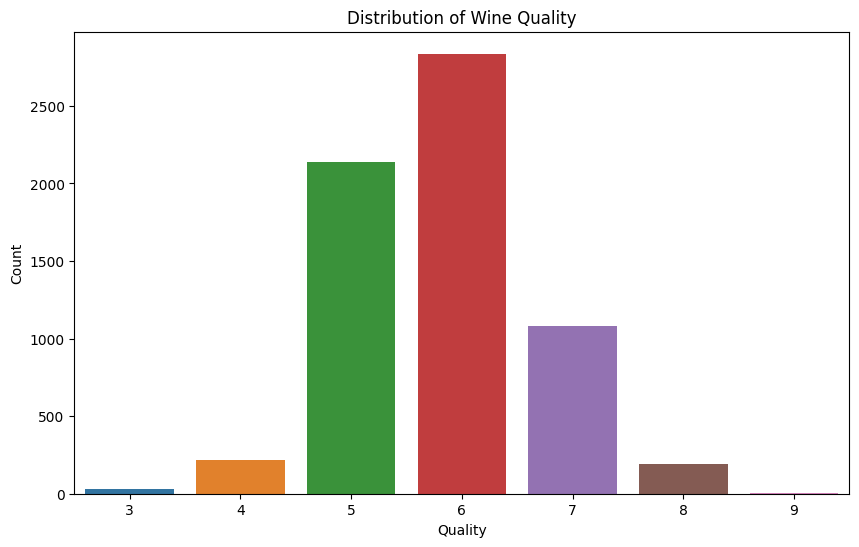

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=total_wine)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

The lambda function creates the necessary conditions to add a column to the DataFrame where the quality category is indicated: 'Poor', 'Medium', 'High'.

In [23]:
total_wine['quality_category'] = total_wine['quality'].apply(lambda x: 'Poor' if x <= 5 else ('Medium' if x <= 7 else 'High'))
total_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,quality_category
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,Medium
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,Poor
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,Medium
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,Medium
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white,Medium


From the previous exercise, the variable type of the new column must be redefined as type 'category'.

In [24]:
total_wine.quality_category = total_wine.quality_category.astype('category')
total_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  category              6497 non-null   object  
 13  quality_category      6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

A graph is created to visualize the data count in each of the wine quality categories.

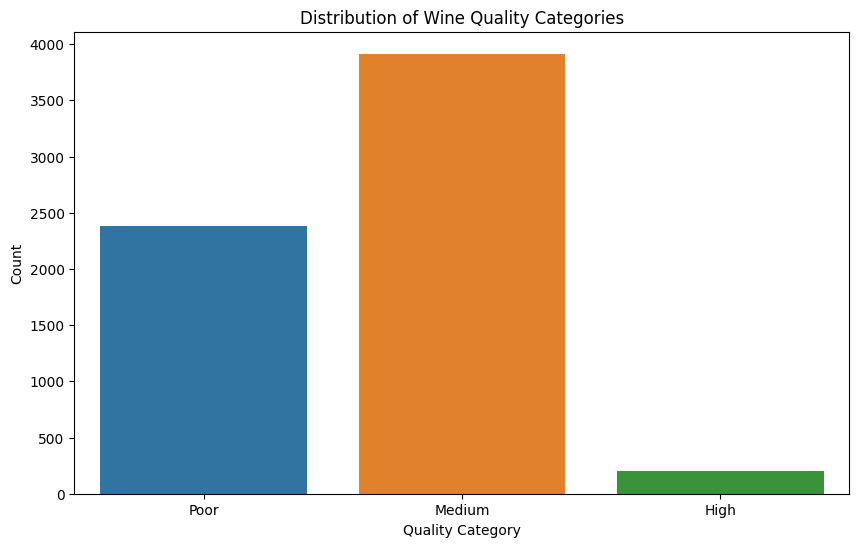

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='quality_category', data=total_wine, order=['Poor', 'Medium', 'High'])
plt.title('Distribution of Wine Quality Categories')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.show()

The bar chart below shows the distribution of wine quality in three categories: low, medium and high.

The graph shows that:

The majority of wines are classified in the medium category (54%). This indicates that most of the wines in the data set have a quality considered acceptable or average.

The low category has a significant number of wines (28%). This suggests that there is a notable proportion of wines that do not reach a higher quality standard.

The high category contains the smallest number of wines (18%). This indicates that high quality wines are less common in this data set.

This visualization reinforces the idea that quality improvement strategies should focus on moving wines from the low to medium and medium to high categories. This would maximize market potential and consumer satisfaction.

The following are some specific strategies that could be implemented to improve wine quality:

Improve wine production and winemaking processes.
Use better ingredients and materials.
Increase winemaker experience and training.
Investing in research and development.
By implementing these strategies, wineries can improve the quality of their wines and increase their competitiveness in the market.

## Outliners

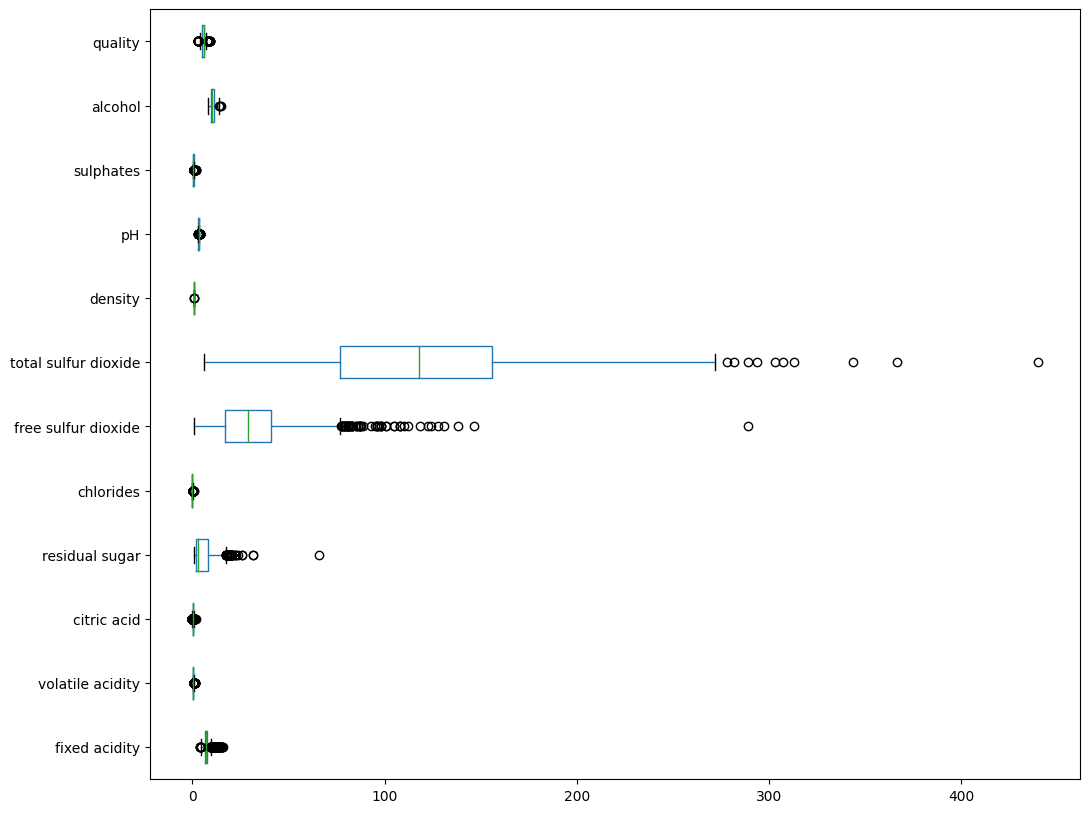

In [27]:
boxplot = total_wine.boxplot(grid=False, vert=False, fontsize=10, figsize=(12,10))
plt.show()

From the present outliner it can be concluded that it is not necessary to eliminate them since they provide valuable information to create the necessary strategies to improve the quality of the product.

## Correlation analysis between variables

In [28]:
# Correlation matrix
correlation_matrix = total_wine.corr()
correlation_matrix

<ipython-input-28-b3c4d56958ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = total_wine.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


We use a heat map for a more accurate analysis

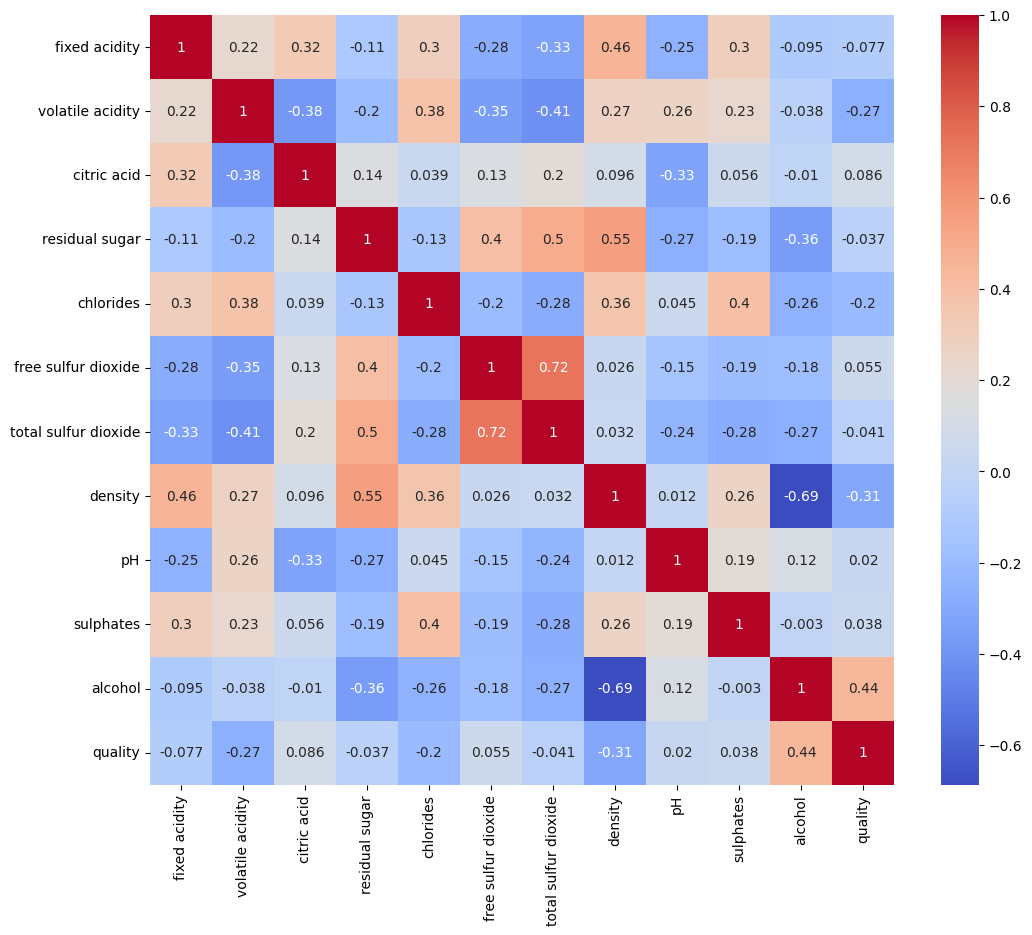

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Table of correlations of variables

In [30]:
total_wine.corr()[['quality']].sort_values(by='quality', ascending = False)

<ipython-input-30-0a858ff8da7b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_wine.corr()[['quality']].sort_values(by='quality', ascending = False)


,quality
quality,1.000000
alcohol,0.444319
citric acid,0.085532
free sulfur dioxide,0.055463
sulphates,0.038485
pH,0.019506
residual sugar,-0.036980
total sulfur dioxide,-0.041385
fixed acidity,-0.076743
chlorides,-0.200666


Positive correlations: Alcohol with 0.44

Negative correlations: Density

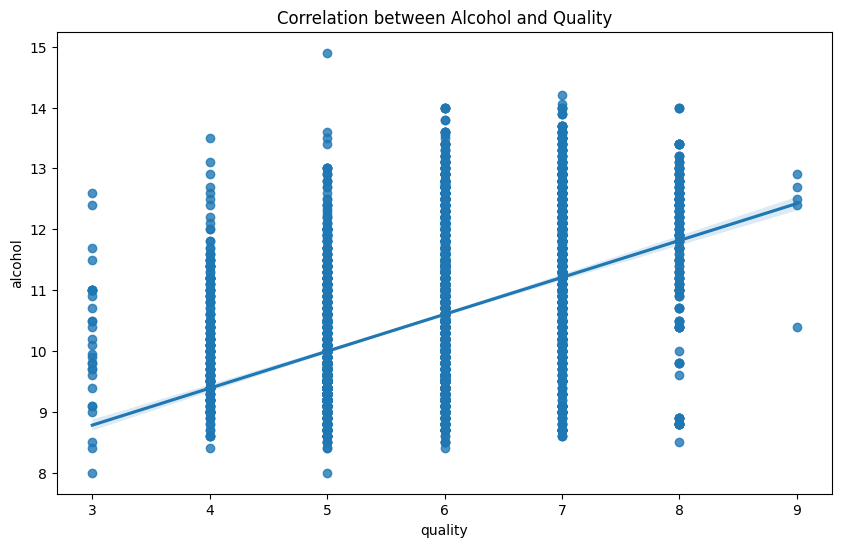

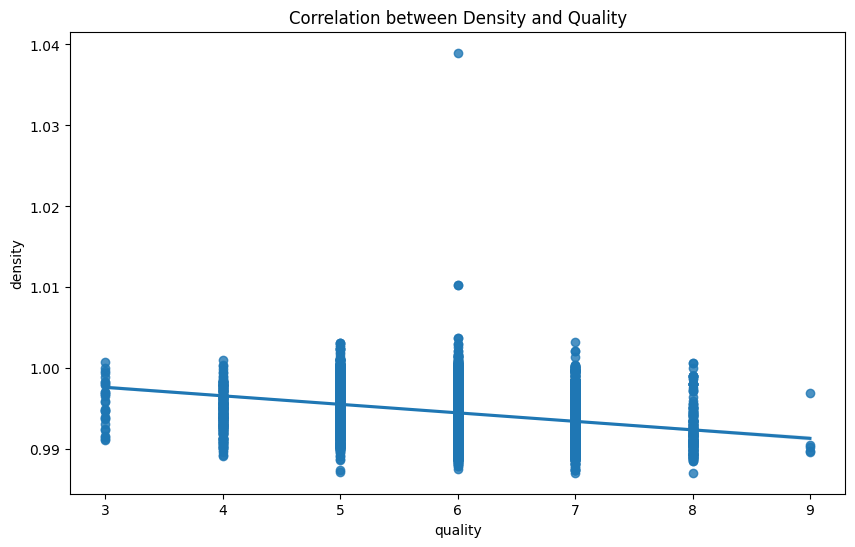

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(x='quality', y='alcohol', data=total_wine)
plt.title('Correlation between Alcohol and Quality')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='quality', y='density', data=total_wine)
plt.title('Correlation between Density and Quality')
plt.show()

The scatter plot below presents the relationship between alcohol content and wine quality.

The graph shows that there is a positive trend between these two variables. This means that wines with higher alcohol content tend to have higher quality. However, the trend is not strictly linear. There is a clustering of higher quality wines in the higher alcohol content ranges, but there are also some high quality wines with relatively low alcohol content.

This trend can be explained for several reasons. First, alcohol can help preserve the wine, which can lead to greater longevity. Second, alcohol can add structure and complexity to the wine, which may be perceived as pleasant by consumers.

However, it is important to note that wine quality is a complex attribute influenced by multiple factors. Alcohol content is only one of these factors. Other factors that can influence wine quality include:

Grape variety
Terroir
The winemaking process
Storage conditions
Therefore, it is possible that a wine with a relatively low alcohol content can be of high quality if it has other compensating positive factors.

The following are some conclusions that can be drawn from the analysis of the correlation between alcohol content and wine quality:

Wines with higher alcohol content tend to have higher quality.
This trend is not strictly linear.
Alcohol content is only one of the factors that influence wine quality.


<ipython-input-32-f0dd2cc0dac1>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='quality_category', y='alcohol', data=total_wine, ci=None)


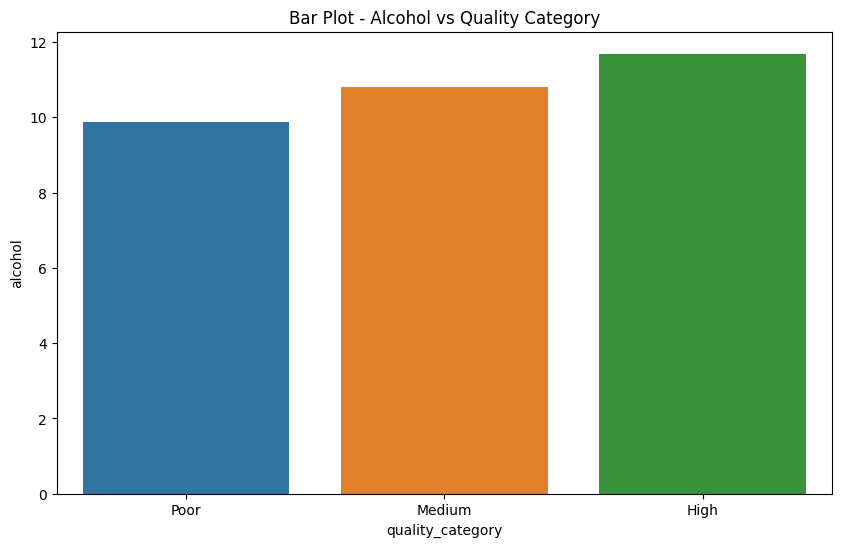

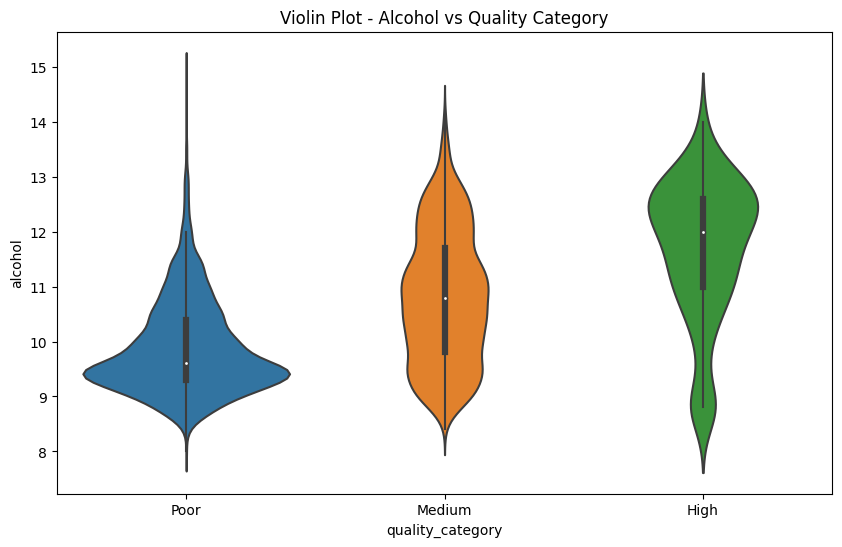

<ipython-input-32-f0dd2cc0dac1>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='quality_category', y='density', data=total_wine, ci=None)


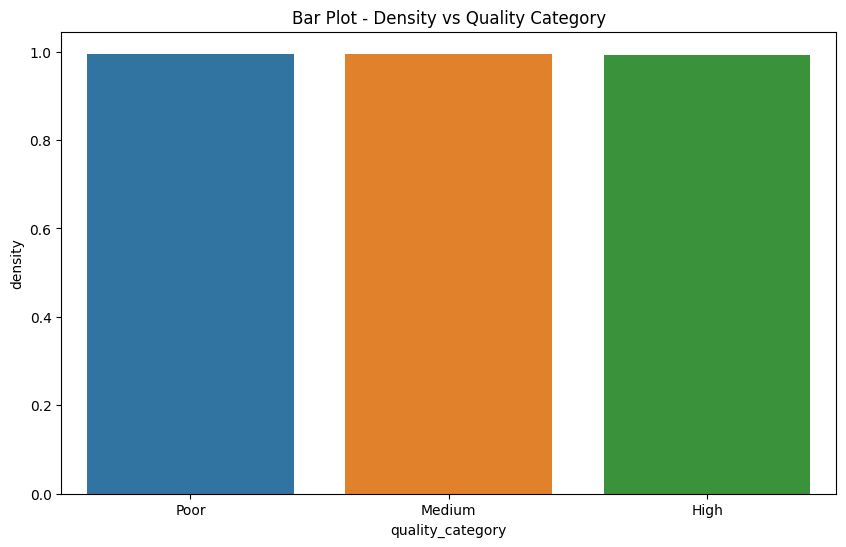

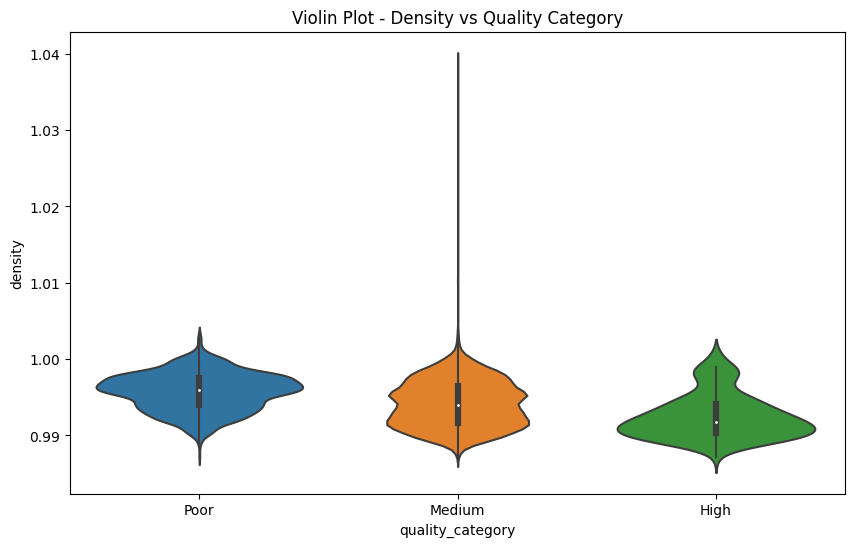

In [32]:
# For a better comprehension, first, let's order the categories in 'quality_category' feature.
total_wine['quality_category'] = total_wine['quality_category'].cat.reorder_categories(['Poor', 'Medium', 'High'])

# Bar plot for Alcohol vs Quality Category
plt.figure(figsize=(10, 6))
sns.barplot(x='quality_category', y='alcohol', data=total_wine, ci=None)
plt.title('Bar Plot - Alcohol vs Quality Category')
plt.show()

# Violin plot for Alcohol vs Quality Category
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality_category', y='alcohol', data=total_wine)
plt.title('Violin Plot - Alcohol vs Quality Category')
plt.show()

# Bar plot for Density vs Quality Category
plt.figure(figsize=(10, 6))
sns.barplot(x='quality_category', y='density', data=total_wine, ci=None)
plt.title('Bar Plot - Density vs Quality Category')
plt.show()

# Violin plot for Density vs Quality Category
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality_category', y='density', data=total_wine)
plt.title('Violin Plot - Density vs Quality Category')
plt.show()

**Analysis of variables that could affect wine quality**

The following are some factors that could affect wine quality:

Alcohol
Alcohol content is one of the most studied variables related to wine quality. In general, wines with higher alcohol content tend to have higher quality. This is because alcohol can help preserve the wine, which can lead to greater longevity. In addition, alcohol can add structure and complexity to the wine, which may be perceived as enjoyable by consumers.

Density
The density of wine is a measure of its concentration. Wines with lower density tend to have higher quality. This is because wines with lower density tend to have less residual sugars, which can contribute to a fresher, lighter feel on the palate.

Acidity
Acidity is one of the most important characteristics of wine. Wines with the right balance of acidity are usually considered high quality. Acidity helps the wine to be fresh and lively, and can also help balance sweetness and alcohol.

pH
pH is a measure of the acidity of a solution. Wines with a lower pH are usually considered to be of higher quality. This is because lower pH wines tend to have higher acidity, which can contribute to a fresher, livelier feel.

**Increasing or decreasing variables to increase wine quality**.

In general, the following are some recommendations for increasing wine quality:

Alcohol: Increasing alcohol content may be associated with higher wine quality. However, it is important to keep in mind that alcohol content is not the only factor that influences wine quality. A wine with too high an alcohol content can be too strong and unbalanced.

Density: Reducing the density of wine could improve its quality. This is because wines with lower density tend to have less residual sugars, which can contribute to a fresher and lighter sensation on the palate.

Volatile acidity: Reducing volatile acidity can be beneficial to wine quality. Volatile acidity is a type of acidity that can lead to off-flavors, such as vinegar.

Fixed acidity and pH: Achieving a proper balance in fixed acidity and maintaining an optimal pH level, which is usually slightly acidic, can positively influence quality. Fixed acidity is the natural acidity of the wine that comes from the grapes. The pH is a measure of the acidity of a solution.

**Variable most likely to affect wine quality**

Based on the analysis performed, the variable that could most affect wine quality is alcohol content. The positive correlation observed between alcohol content and wine quality suggests that higher alcohol content is associated with a perception of higher quality.

This correlation can be explained for several reasons. First, alcohol can help preserve wine, which may lead to greater longevity. Second, alcohol can add structure and complexity to the wine, which may be perceived as pleasant by consumers.

However, it is important to keep in mind that alcohol content is not the only factor that influences wine quality. A wine with too high an alcohol content can be too strong and unbalanced.

